In [1]:
import importlib
import datamanip
importlib.reload(datamanip)

<module 'datamanip' (<_frozen_importlib_external.NamespaceLoader object at 0x10351d110>)>

In [2]:
import torch
from filepath import *
from datamanip.plots import generate_matrix, generate_metrics
from models.GAT import GAT#, GCN, SimpleMPNN
from train_eval.train import train
from train_eval.evaluate import evaluate
from datamanip.datasetmanip.three_five_dataset import ThreeFiveDataset
from datamanip.datasetmanip.dataset_util import create_loaders

# Model Selection by number of 9's
### 1. Match 1-1: 0 vs. 7
### 2. Match 2-1: 0/1 vs. 2/3
### 3. Match 2-2: 4/5 vs. 6/7
### 4. Match 3-1: 0 vs. 1
### 5. Match 3-2: 2 vs. 3
### 6. Match 3-3: 4 vs. 5
### 7. Match 3-4: 6 vs. 7



In [3]:
match = "2-1"

In [4]:
if match == "1-1":
    NUM_EPOCHS = 200
    DROPOUT_RATE = 0.15
    LEARNING_RATE = 0.0008
    NODE_FEATURES = 12
    PATIENCE = 30
    HIDDEN_DIM = 128
elif match == "2-1":
    NUM_EPOCHS = 200
    DROPOUT_RATE = 0.15
    LEARNING_RATE = 0.0008
    NODE_FEATURES = 12
    PATIENCE = 15
    HIDDEN_DIM = 16
elif match == "2-2":
    NUM_EPOCHS = 150
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 12
    PATIENCE = 15
    HIDDEN_DIM = 28
elif match == "3-1":
    NUM_EPOCHS = 150
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 12
    PATIENCE = 15
    HIDDEN_DIM = 82
elif match == "3-2":
    NUM_EPOCHS = 200
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0001
    NODE_FEATURES = 12
    PATIENCE = 30
    HIDDEN_DIM = 128
elif match == "3-3":
    NUM_EPOCHS = 250
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 12
    PATIENCE = 30
    HIDDEN_DIM = 64
elif match == "3-4":
    NUM_EPOCHS = 200
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 12
    PATIENCE = 20
    HIDDEN_DIM = 32
else:
    NUM_EPOCHS = 100
    DROPOUT_RATE = 0.2
    LEARNING_RATE = 0.0007
    NODE_FEATURES = 12
    PATIENCE = 15
    HIDDEN_DIM = 64

In [5]:
#Create list of Data objects, each containing the node features, edge indices, and target values
train_list = ThreeFiveDataset(root=dataset_path, match=match, test_train_val="train")
test_list = ThreeFiveDataset(root=dataset_path, match=match, test_train_val="test")
val_list = ThreeFiveDataset(root=dataset_path, match=match, test_train_val="val")

In [6]:
train_loader, val_loader, test_loader = create_loaders(train_list, val_list, test_list)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GAT(input_dim=NODE_FEATURES, hidden_dim=HIDDEN_DIM, output_dim=2, dropout_rate=DROPOUT_RATE).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = torch.nn.CrossEntropyLoss()

In [8]:
train_config = {
    "num_epochs": NUM_EPOCHS,
    "patience": PATIENCE,
    "device": device,
    "criterion": criterion,
    "optimizer": optimizer,
}

In [9]:
train(model, train_loader, val_loader, train_config, model_checkpoints_path + "/booster/" + match + ".pth")

Epoch 1/200, Train Loss: 0.4117
Epoch 1/200, Validation Loss: 0.6146
Best model updated based on validation loss.
Epoch 2/200, Train Loss: 0.2898
Epoch 2/200, Validation Loss: 0.3228
Best model updated based on validation loss.
Epoch 3/200, Train Loss: 0.2692
Epoch 3/200, Validation Loss: 0.2185
Best model updated based on validation loss.
Epoch 4/200, Train Loss: 0.2789
Epoch 4/200, Validation Loss: 0.3165
No improvement in validation loss for 1 epoch(s).
Epoch 5/200, Train Loss: 0.2663
Epoch 5/200, Validation Loss: 0.2712
No improvement in validation loss for 2 epoch(s).
Epoch 6/200, Train Loss: 0.2702
Epoch 6/200, Validation Loss: 0.2858
No improvement in validation loss for 3 epoch(s).
Epoch 7/200, Train Loss: 0.2694
Epoch 7/200, Validation Loss: 0.2143
Best model updated based on validation loss.
Epoch 8/200, Train Loss: 0.2617
Epoch 8/200, Validation Loss: 0.2413
No improvement in validation loss for 1 epoch(s).
Epoch 9/200, Train Loss: 0.2857
Epoch 9/200, Validation Loss: 0.3625

([0.41168823137496063,
  0.2897921053319371,
  0.26916174963715567,
  0.27886971000018995,
  0.26634686382134054,
  0.27024247612113417,
  0.2694160234270915,
  0.26172121843604607,
  0.28573140965341437,
  0.2682974828449093,
  0.24576397489912066,
  0.2471064952245064,
  0.24099013571291045,
  0.23758579097540464,
  0.23582038219063867,
  0.23530878591184512,
  0.22486566129317237,
  0.221859626707572,
  0.23022516506313798,
  0.23800749492123802,
  0.22669356832099083,
  0.22071608311286053,
  0.22355423574131242,
  0.21796218865118833,
  0.21843641826589488,
  0.21291383379513332,
  0.20539810383115423,
  0.21026503590972734,
  0.20350652341386513,
  0.2027345447694246,
  0.20362292588683442,
  0.2040320458509515],
 [0.6145682015130893,
  0.3227980108036158,
  0.21854066326079938,
  0.31652685794501734,
  0.27117383875884116,
  0.2857842069889347,
  0.2143456193809517,
  0.2412681682781579,
  0.3624754686338397,
  0.2155570104951039,
  0.22255187937154028,
  0.19778910101665995,
  

In [10]:
# Load the best model after training
model.load_state_dict(torch.load(model_checkpoints_path + "/booster/" + match + ".pth", weights_only=True))

<All keys matched successfully>

In [11]:
true_values, predicted_values, accuracy = evaluate(device, model, test_loader, model_checkpoints_path + "/booster/" + match + ".pth")

GAT(
  (conv1): GATConv(12, 16, heads=1)
  (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): GATConv(16, 8, heads=1)
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.15, inplace=False)
  (fc): Linear(in_features=8, out_features=2, bias=True)
)
[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1)]
[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1)]
Accuracy: 0.9399


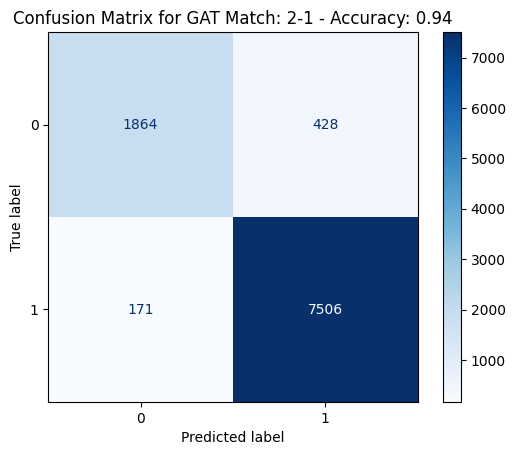

In [12]:
generate_matrix(true_values, predicted_values, accuracy, "GAT Match: "  + match)

In [13]:
generate_metrics(true_values, predicted_values, match, model_checkpoints_path, NUM_EPOCHS, LEARNING_RATE, NODE_FEATURES, DROPOUT_RATE, PATIENCE, HIDDEN_DIM)

Precision: 0.9461
Recall: 0.9777
F1 Score: 0.9616
AUROC: 0.8955
Accuracy: 0.9399
Metrics saved to /Users/jawayria/Desktop/EDISS/DIE/temp/ADES-reliability-estimation/src/../models/booster/results/2-1.csv
